In [76]:
import os
import sys
import joblib
import numpy as np
sys.path.append('/Users/eudermelo/Documents/GitHub/ud120-projects/tools/')
sys.path.append(os.path.abspath('/Users/eudermelo/Documents/GitHub/ud120-projects/tools/'))
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("/Users/eudermelo/Documents/GitHub/ud120-projects/final_project/final_project_dataset_modified.pkl", "rb") )

In [77]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = '/Users/eudermelo/Documents/GitHub/ud120-projects/tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

In [78]:
### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

In [79]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train,target_train)

LinearRegression()

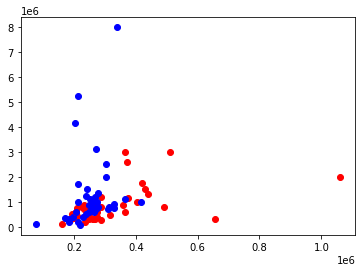

In [80]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


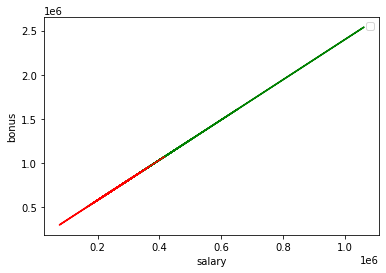

slope: [2.27410114]
intercept: 124444.38886605494
score: 0.251488150398397


In [84]:
### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test), color='g' )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
reg.fit(feature_test,target_test)
plt.plot(feature_train, reg.predict(feature_train), color='r')
plt.legend()
plt.show()
print("slope:",reg.coef_)
print("intercept:", reg.intercept_)
print("score:", reg.score(feature_test, target_test))

In [82]:
#Slope and intercept?
print(reg.coef_)
print(reg.intercept_)

[2.27410114]
124444.38886605494


In [83]:
# Score
import sklearn.metrics
reg.score(feature_test,target_test)


0.251488150398397